### EDA on Rhode Island, Statewide
* From 2005-01-02 to 2015-12-31

* This is an analysis on the police driver cases on Rhode Island between the years 2005 and 2015, as collected from the Stanford Open Policing Project.
* The dataset was downloaded from [Stanford Open Policing](https://openpolicing.stanford.edu/data/) and no prior filtering was performed before importing it into this project.

In [1]:
#Import the necessary modules
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read the dataset using Pandas
ri = pd.read_csv('ri_statewide_2020_04_01.csv', low_memory=False)
ri.shape

In [4]:
#A view of the columns in the dataframe before filtering
ri.head()

#Check for the Nan values per column
ri.isna().sum()

raw_row_number                0
date                         10
time                         10
zone                         10
subject_race              29073
subject_sex               29097
department_id                10
type                          0
arrest_made               29073
citation_issued           29073
warning_issued            29073
outcome                   35841
contraband_found         491919
contraband_drugs         493693
contraband_weapons       497886
contraband_alcohol       508464
contraband_other         491919
frisk_performed              10
search_conducted              0
search_basis             491919
reason_for_search        491919
reason_for_stop           29073
vehicle_make             191564
vehicle_model            279593
raw_BasisForStop          29073
raw_OperatorRace          29073
raw_OperatorSex           29073
raw_ResultOfStop          29073
raw_SearchResultOne      491919
raw_SearchResultTwo      508862
raw_SearchResultThree    509513
dtype: i

In [5]:
#Extract the necessary columns for the analysis
ri = ri[['date','time','zone','subject_race','subject_sex','department_id','arrest_made','citation_issued','warning_issued','outcome','frisk_performed','search_conducted','search_basis','reason_for_search','reason_for_stop']].dropna(subset=['date'])

#Merge the date and time columns into a single date_time column and drop them
ri['date_time'] = pd.to_datetime(ri.date.str.cat(ri.time, sep=' '))
ri.drop(['date', 'time'], axis='columns', inplace=True)

#Specify the desired datatypes for each column
ri = ri.astype({'zone':'category', 'subject_race':'category','subject_sex':'category','department_id':'category','arrest_made':bool,'citation_issued':bool,'warning_issued':bool,'outcome':'category','frisk_performed':bool,'search_conducted':bool})

#Drop Nan's in relation to the subject_sex and outcome columns
ri.dropna(subset=['subject_sex', 'outcome'], inplace=True)

#Extract the day_name, month_name and year from the date_time column and assign their individual columns
ri['year'] = ri.date_time.dt.year.astype('category')
ri['month'] = ri.date_time.dt.month_name().astype('category').cat.reorder_categories(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
ri['day'] = ri.date_time.dt.day_name().astype('category').cat.reorder_categories(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

#Set date_time as index
ri.set_index('date_time', inplace=True)

In [6]:
#Confirm if the data types of the columns are as desired
ri.dtypes

zone                 category
subject_race         category
subject_sex          category
department_id        category
arrest_made              bool
citation_issued          bool
warning_issued           bool
outcome              category
frisk_performed          bool
search_conducted         bool
search_basis           object
reason_for_search      object
reason_for_stop        object
year                 category
month                category
day                  category
dtype: object

In [7]:
#Confirm if the changes were made as desired
ri.head()

,zone,subject_race,subject_sex,department_id,arrest_made,citation_issued,warning_issued,outcome,frisk_performed,search_conducted,search_basis,reason_for_search,reason_for_stop,year,month,day
date_time,,,,,,,,,,,,,,,,
2005-11-22 11:15:00,X3,white,male,200,False,True,False,citation,False,False,NaN,NaN,Speeding,2005,November,Tuesday
2005-10-01 12:20:00,X3,white,male,200,False,True,False,citation,False,False,NaN,NaN,Speeding,2005,October,Saturday
2005-10-01 12:30:00,X3,white,female,200,False,True,False,citation,False,False,NaN,NaN,Speeding,2005,October,Saturday
2005-10-01 12:50:00,X3,white,male,200,False,True,False,citation,False,False,NaN,NaN,Speeding,2005,October,Saturday
2005-10-01 13:10:00,X3,white,female,200,False,True,False,citation,False,False,NaN,NaN,Speeding,2005,October,Saturday


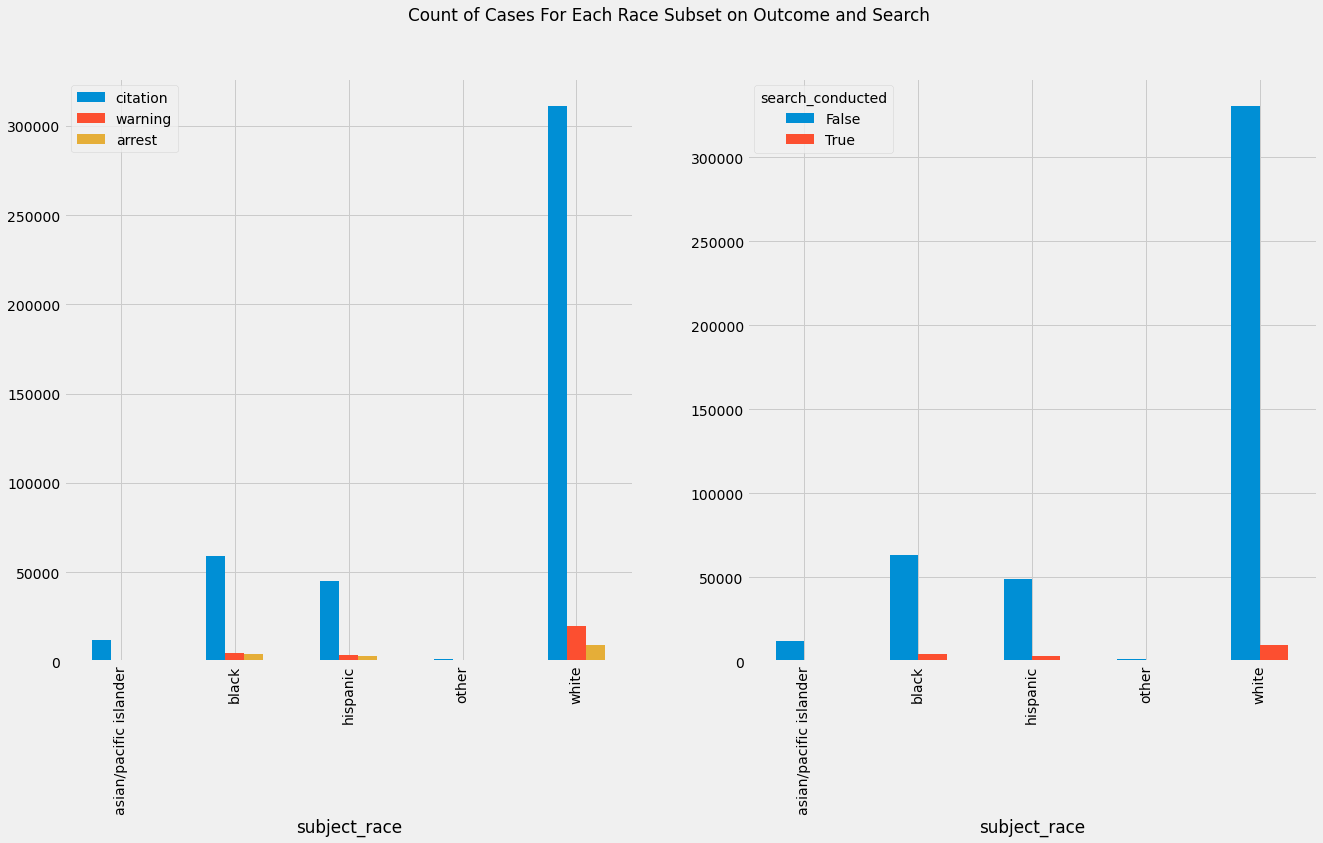

In [27]:
#Set the style
plt.style.use('fivethirtyeight')

#Create the figure and axes
fig,ax = plt.subplots(1,2)

#Set the figure size
fig.set_size_inches([20,10])

#Create a bar plot on the count of subject_race subset by outcome on the first axis
ri.groupby('subject_race')['outcome'].value_counts().unstack().plot(kind='bar', ax=ax[0])

#Create a bar plot on the count of subject_race subset by search_conducted on the second axis
ri.groupby('subject_race')['search_conducted'].value_counts().unstack().plot(kind='bar', ax=ax[1])

#Create a title
plt.suptitle('Count of Cases For Each Race Subset on Outcome and Search')

#Show the plot
plt.show()

**From the plots above it was observed:**
- Overall the white race is the race with the most occurence in the dataset which isn't a sign for concern due to the region being dominated by people of the white race.
- A citaton is the most popular outcome and arrests are extremely unpopular with the asian/pacific islander race and other having little to no arrests and warning.
- Searches are uncommon and constitute a very low percentage in the count of each race with white race having the highest number of searches.

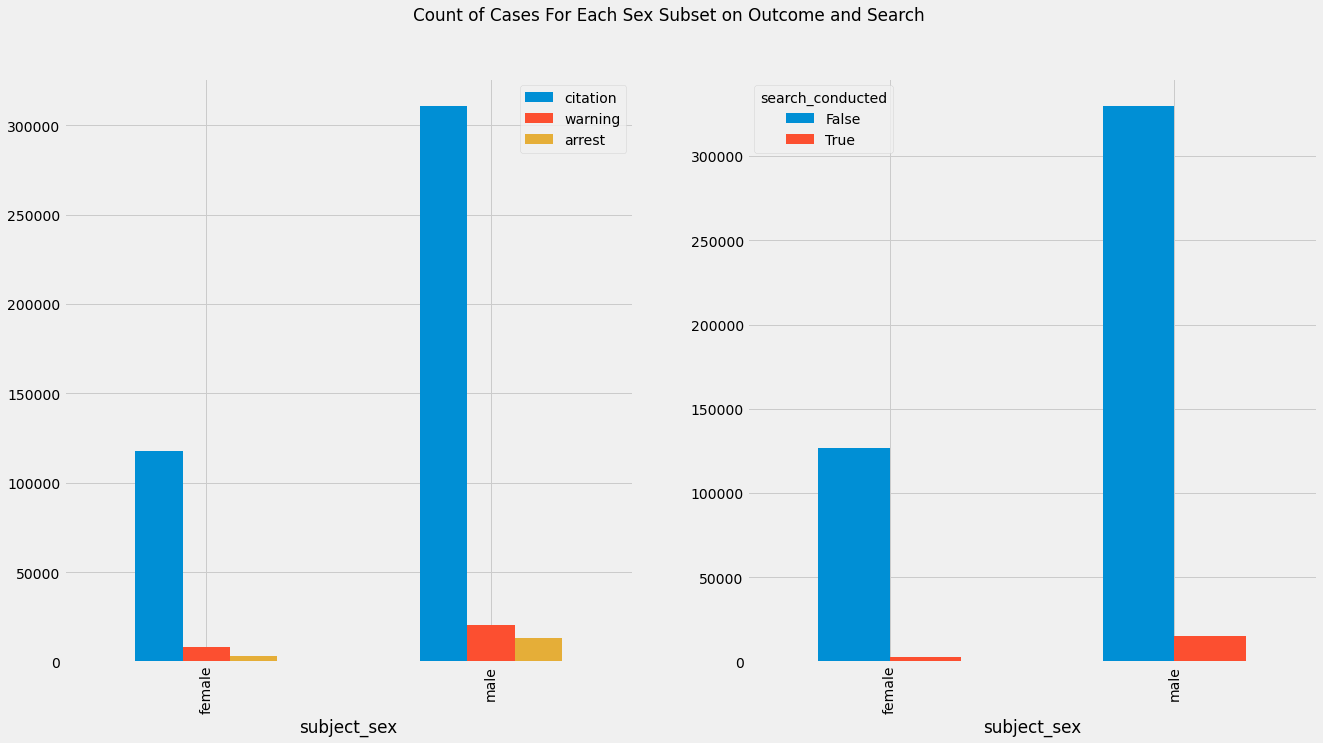

In [26]:
#Create the figure and axes
fig,ax = plt.subplots(1,2)

#Set the figure size
fig.set_size_inches([20,10])

#Create a bar plot on the count of subject_sex subset by outcome on the first axis
ri.groupby('subject_sex')['outcome'].value_counts().unstack().plot(kind='bar', ax=ax[0])

#Create a bar plot on the count of subject_sex subset by search_conducted on the first axis
ri.groupby('subject_sex')['search_conducted'].value_counts().unstack().plot(kind='bar', ax=ax[1])

#Create a title
plt.suptitle('Count of Cases For Each Sex Subset on Outcome and Search')

#Show the plot
plt.show()

**From the plots above it was observed:**
- Males dominate the dataset which may either mean that there are more males driving in rhode island or the island is more populated by males.  
- The ratio between the 3 outcomes is about the same in both the male and female sexes eliminating the idea of a bias in the relationship between outcome and sex.
- The relationship between subject_sex and search_conducted shows no obvious bias as the ratio of False and True between the two sexes can be assumed not to differ by much.

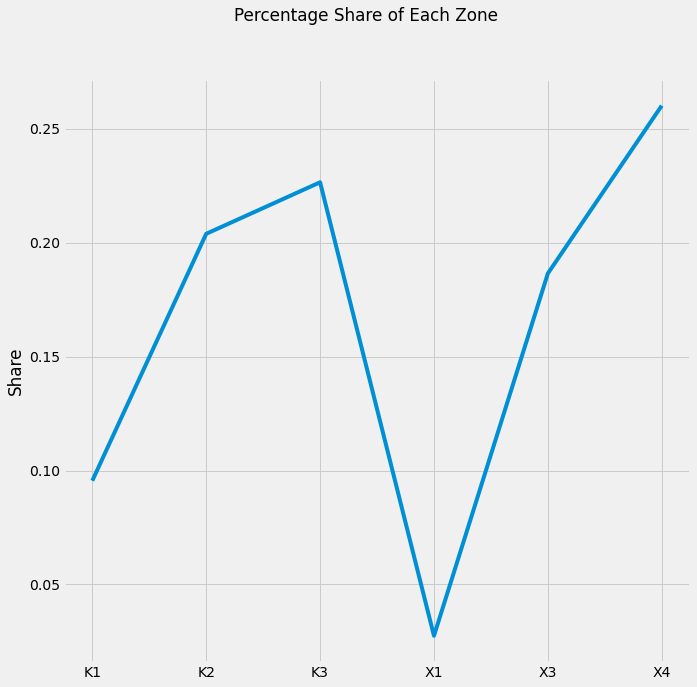

In [25]:
#Create the figure and axes
fig,ax = plt.subplots()

#Set the figure size
fig.set_size_inches([10,10])

#Create a bar plot on the count of zone 
ri.zone.value_counts(normalize=True, sort=False).plot()

#Create a title
plt.suptitle('Percentage Share of Each Zone')

#Create y_label
plt.ylabel('Share')

#Show the plot
plt.show()

**From the plot above it was observed:**
- Zone X4 has the highest number of occurences with X1 having the lowest number.

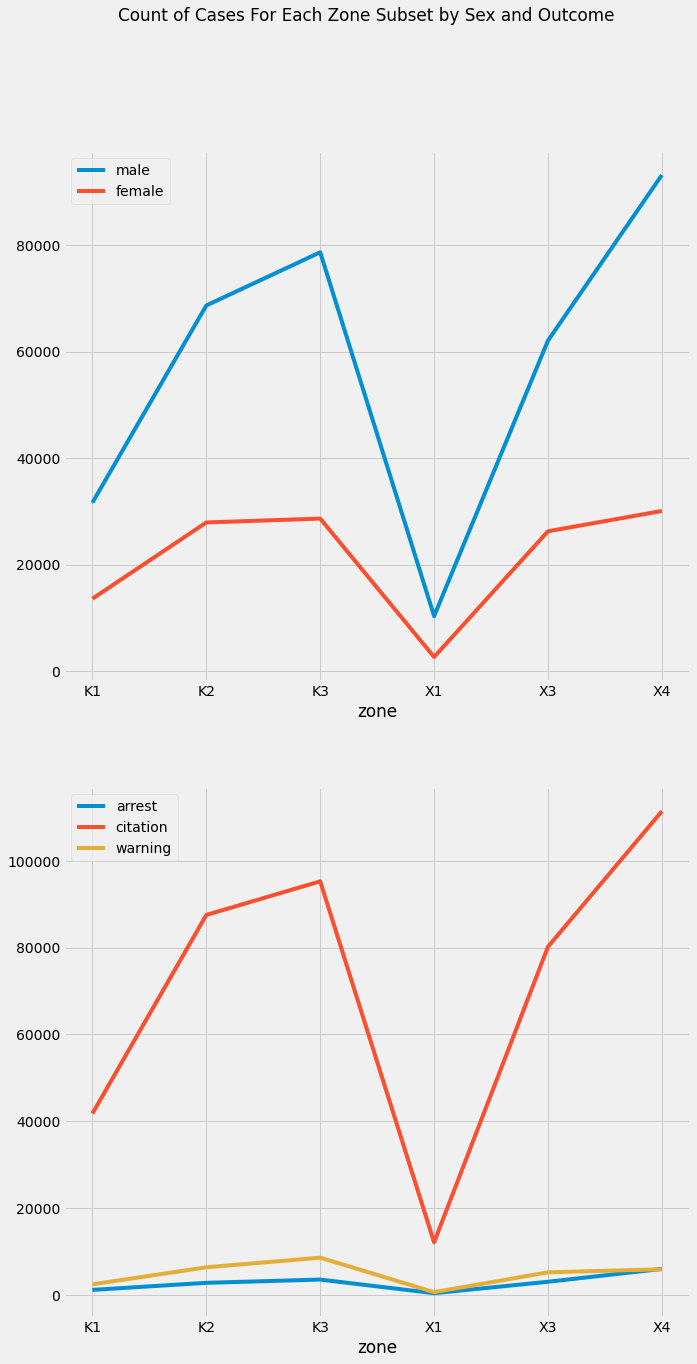

In [24]:
#Create the figure and axes
fig,ax = plt.subplots(2,1)

#Set the figure size
fig.set_size_inches([10,20])

#Create a bar plot on the count of zone subset by search_conducted on the first axis
ri.groupby('zone')['subject_sex'].value_counts().unstack().plot(ax=ax[0])

#Create a bar plot on the count of zone subset by search_conducted on the first axis
ri.groupby('zone')['outcome'].value_counts().unstack().plot(ax=ax[1])

#Create a title
plt.suptitle('Count of Cases For Each Zone Subset by Sex and Outcome')

#Show the plot
plt.show()

**From the plots above it was observed:**
- Males have an overall higher count than Females in all the zones.
- It still concurs that citations are the most popular outcome and arrests and warnings are extremely uncommon in comparison.
- Zone K3 has the highest number of arrests and warnings.

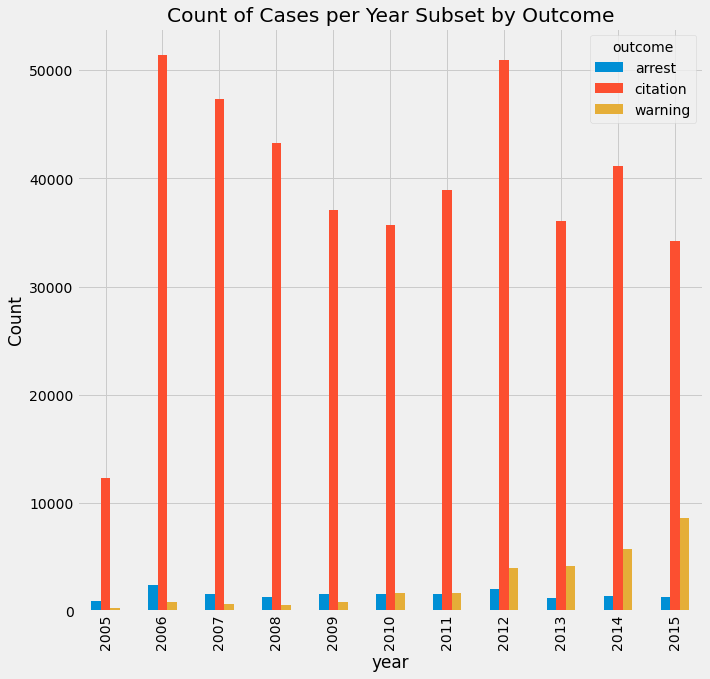

In [23]:
#Create the figure and axes
fig,ax = plt.subplots()

#Set the figure size
fig.set_size_inches([10,10])

#Create a crosstable with index ri.year and columns from ri.outcome and plot
cross_t_year = pd.crosstab(index=ri.year, columns=ri.outcome)
cross_t_year.plot(kind='bar', ax=ax)

#Create a title
plt.title('Count of Cases per Year Subset by Outcome')

#Create y_label
plt.ylabel('Count')

#Show the plot
plt.show()

**From the plot above it was observed:**
- A citaton is the most popular outcome.
- Although citation occurences in 2005 are odly low in comparison with the others and that of 2006 and 2012 coming up higher than that of other years.
- We can see that from years 2005 to 2009 arrests were more common than warnings, then in 2010 and 2011 their count is about the same but from there we can notice an increase in warnings compared to arrests and with every change of year the difference between them increases.

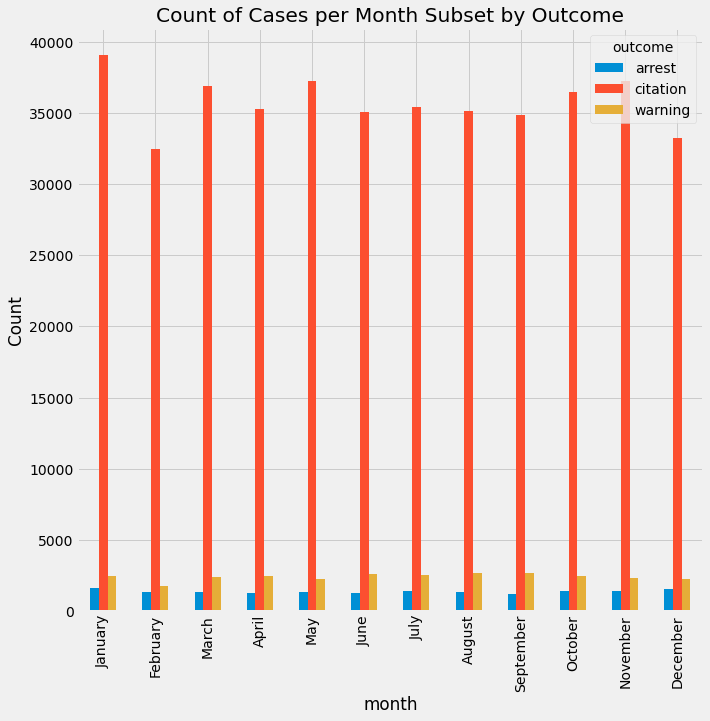

In [22]:
#Create the figure and axes
fig,ax = plt.subplots()

#Set the figure size
fig.set_size_inches([10,10])

#Create a crosstable with index ri.month and columns from ri.outcome and plot
cross_t_month = pd.crosstab(index=ri.month, columns=ri.outcome)
cross_t_month.plot(kind='bar', ax=ax)

#Create a title
plt.title('Count of Cases per Month Subset by Outcome')

#Create y_label
plt.ylabel('Count')

#Show the plot
plt.show()

**From the plot above it was observed:**
- A citaton is still the most popular outcome, although citations in january have the highest counts.
- The ratio between arrests and warnings across all months are relatively the same.

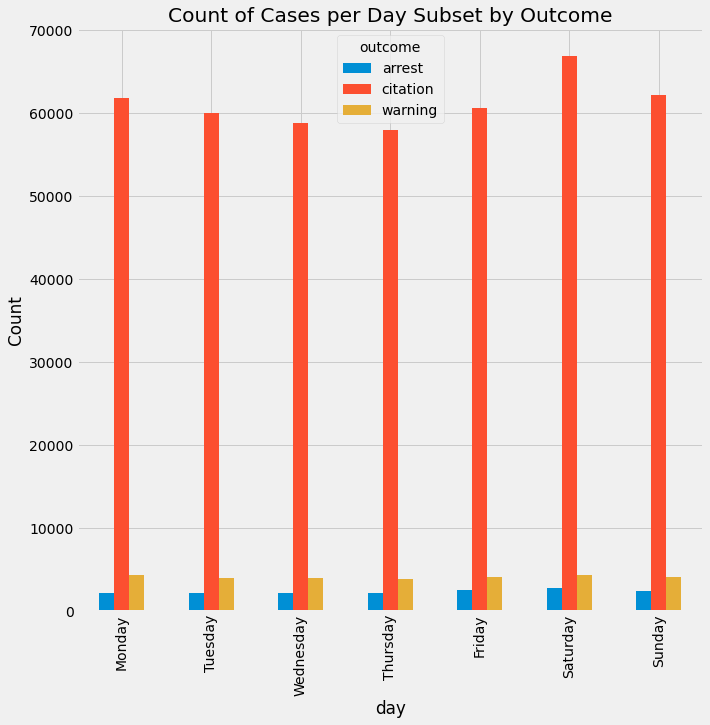

In [21]:
#Create the figure and axes
fig,ax = plt.subplots()

#Set the figure size
fig.set_size_inches([10,10])

#Create a crosstable with index ri.day and columns from ri.outcome and plot
cross_t_day = pd.crosstab(index=ri.day, columns=ri.outcome)
cross_t_day.plot(kind='bar', ax=ax)

#Create a title
plt.title('Count of Cases per Day Subset by Outcome')

#Create y_label
plt.ylabel('Count')

#Show the plot
plt.show()

**From the plot above it was observed:**
- A citaton is still the most popular outcome, with saturday having the highest number compared to other days.
- The ratio between arrests and warnings across all months are relatively the same.

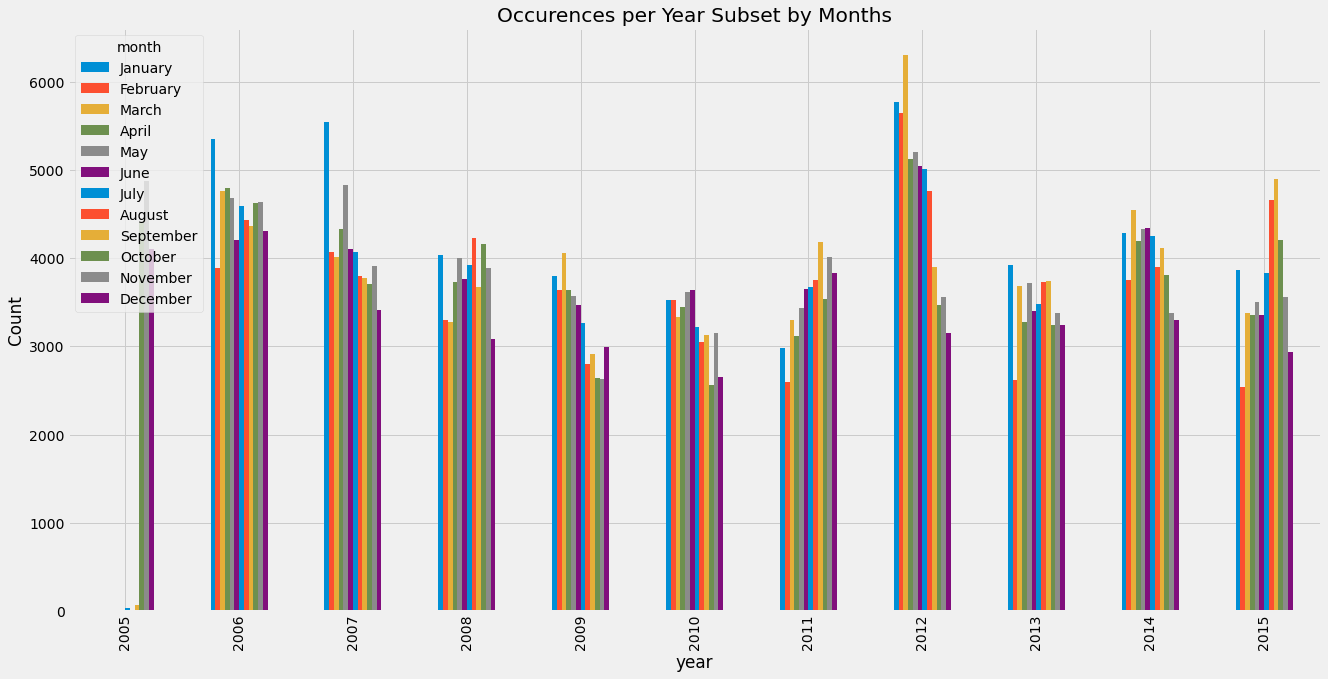

In [20]:
#Create the figure and axes
fig,ax = plt.subplots()

#Set the figure size
fig.set_size_inches([20,10])

#Create a crosstable with index ri.year and columns from ri.month and plot
cross_t_year_month = pd.crosstab(index=ri.year, columns=ri.month)
cross_t_year_month.plot(kind='bar', ax=ax)

#Create a title
plt.title('Occurences per Year Subset by Months')

#Create y_label
plt.ylabel('Count')

#Show the plot
plt.show()

**From the plot above it was observed:**
- The low number of occurences in 2005 observed in former plots is pronounced here also and it is due to the fact that only the last three months have a significant number of occurences.
- There is no relationship between the amount of cases monthly across the years.

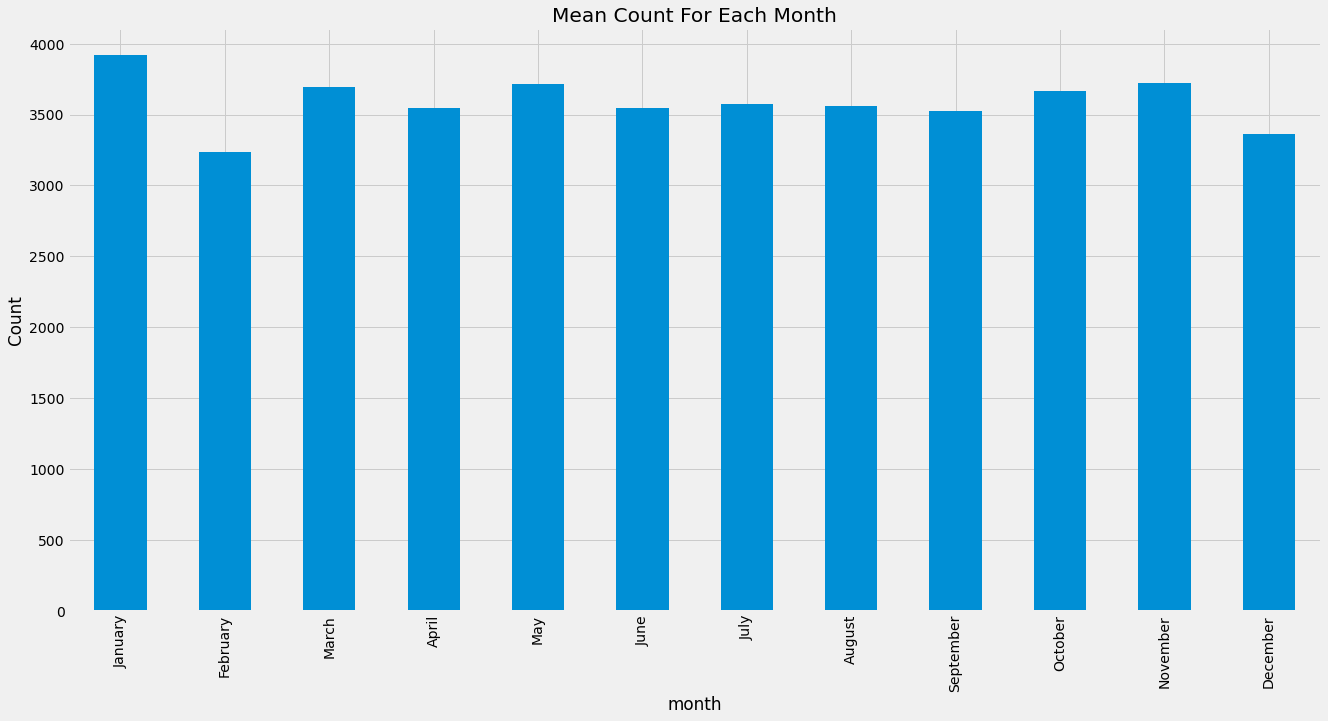

In [40]:
#Create the figure and axes
fig,ax = plt.subplots()

#Set the figure size
fig.set_size_inches([20,10])

#Plot the mean amount of cases for each month per year 
cross_t_year_month.mean().astype('int32').plot(kind='bar', ax=ax)

#Create a title
plt.title('Mean Count For Each Month')

#Create y_label
plt.ylabel('Count')

#Show the plot
plt.show()

**From the plot above it was observed:**
- January has the highest average number of cases with february as the lowest.

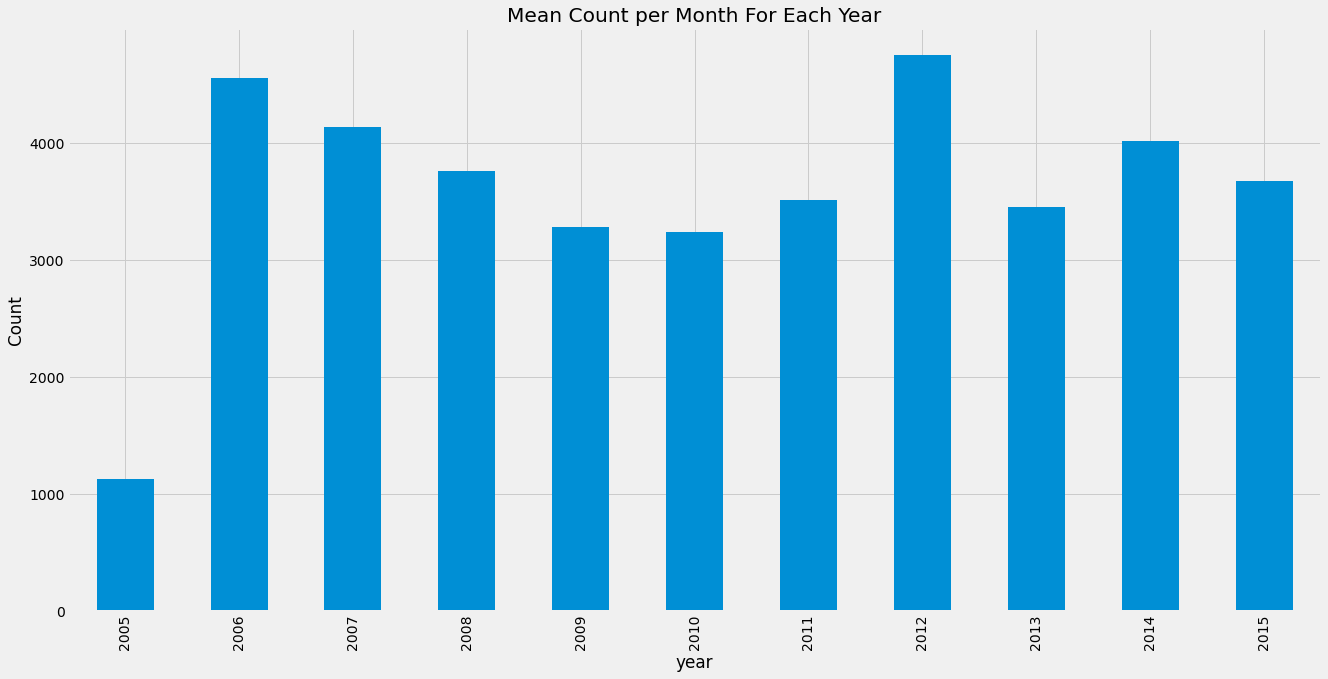

In [39]:
#Create the figure and axes
fig,ax = plt.subplots()

#Set the figure size
fig.set_size_inches([20,10])

#Plot the mean amount of cases per month for each year
cross_t_year_month.mean(axis=1).astype('int32').plot(kind='bar', ax=ax)

#Create a title
plt.title('Mean Count per Month For Each Year')

#Create y_label
plt.ylabel('Count')

#Show the plot
plt.show()

**From the plot above it was observed:**
- 2006 and 2012 are exceptionally high while 2005 is very low for previously stated reasons.

### Summary:
* The distribution of cases between years and months are independent and no relationship can be observed between them.
* There is a high number of male cases compared to female cases.
* Most cases ended in citations, warnings are uncommon with arrests even more so.
* Zones K3 and X4 contain the highest number of cases which points to the probabilty of a larger population in those zones.